In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, backend

In [ ]:
IMAGE_SIZE = 32
CHANNELS = 1
EMBEDDING_DIM = 64

# Loading and preprocessing Fashion-MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

def preprocess(imgs):
    imgs = imgs.astype("float32") / 255.0
    imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
    imgs = np.expand_dims(imgs, -1)
    return imgs

x_train = preprocess(x_train)
x_test = preprocess(x_test)



In [ ]:
# Defining Encoder
encoder_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), name="encoder_input")
x = layers.Conv2D(32, (3, 3), strides=2, activation="relu", padding="same")(encoder_input)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation="relu", padding="same")(x)
shape_before_flattening = backend.int_shape(x)[1:]
x = layers.Flatten()(x)
encoder_output = layers.Dense(EMBEDDING_DIM, name="encoder_output")(x)

encoder = models.Model(encoder_input, encoder_output, name="encoder")

In [ ]:
# Defining Decoder
decoder_input = layers.Input(shape=(EMBEDDING_DIM,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
decoder_output = layers.Conv2D(CHANNELS, (3, 3), activation="sigmoid", padding="same")(x)

decoder = models.Model(decoder_input, decoder_output, name="decoder")

In [ ]:
# Defining Autoencoder
autoencoder_input = keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)

autoencoder = models.Model(autoencoder_input, decoded_img, name="autoencoder")

# Compiling the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Training the autoencoder
autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - loss: 0.0366 - val_loss: 0.0084
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - loss: 0.0076 - val_loss: 0.0062
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 12/20
938/938 ━━━━━━━━━━

In [ ]:
# Testing reconstruction ability
reconstructed_images = autoencoder.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


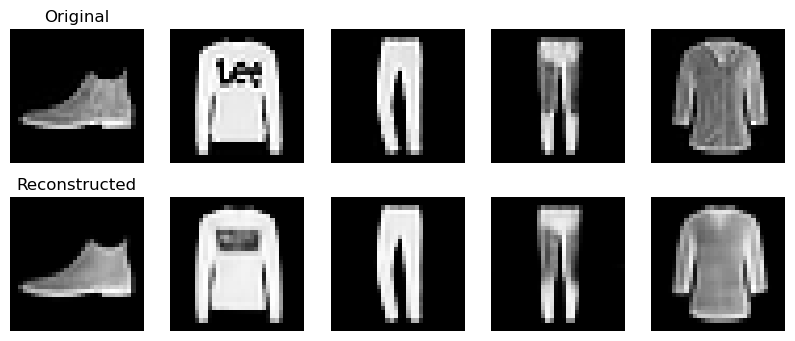

In [ ]:
# Displaying original and reconstructed images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(5):
    axes[0, i].imshow(x_test[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed_images[i].squeeze(), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()

# Discrepancies Between Original and Reconstructed Images

The reconstructed images from the convolutional autoencoder show noticeable differences from the originals, primarily due to blurring, loss of fine details, and shape distortions. Textures like stitching and fabric folds often disappear, and some objects, like boots, appear slightly deformed. The smoothing effect results from compression in the encoder, which prioritizes structural features over intricate details. These discrepancies arise due to the autoencoder’s focus on general patterns rather than exact replication, but improvements like a deeper network, a larger latent space, or a more perceptual loss function could enhance detail preservation.